In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

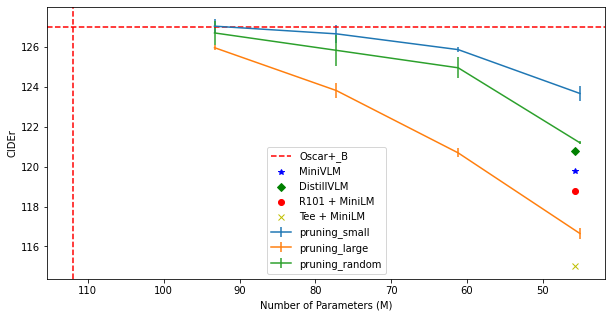

In [44]:
plt.figure(figsize=(10, 5))
output_dir = 'data/experiments/captioning/pruning_{}_{}/{}'
n_repeat = 3
metric = 'CIDEr'
for pruning_strategy in ['small', 'large', 'random']:
    params = []
    res = []
    for pruning_ratio in [0.2, 0.4, 0.6, 0.8]:
        for seed in range(n_repeat):
            resolved_output_dir = output_dir.format(pruning_strategy, pruning_ratio, seed)
            data = json.load(open(resolved_output_dir + '/saved_info.json'))
            params.append(data['params'])
            res.append(data['test_result'][metric])
    params = np.array(params).reshape((-1, n_repeat))
    res = np.array(res).reshape((-1, n_repeat)) * 100
    params = params.mean(1)
    label = 'pruning_' + pruning_strategy
    plt.errorbar(params, res.mean(1), res.std(1), label = label)
#     for x,y,z in zip(params,res.mean(1), res.std(1)):
#         x,y,z = round(x, 2), round(y, 2), round(z, 2)
#         plt.annotate(f"({x},{y}-{z})", (x,y), textcoords="offset points", xytext=(0,10), ha='center')


plt.axhline(y=127, color='r', linestyle="dashed", label='Oscar+_B')
# plt.axhline(y=123.7, color='r', linestyle="dashed", label='Oscar_B')
plt.axvline(x=112, color='r', linestyle="dashed")
plt.plot(45.7,119.8,'b*', label='MiniVLM')
plt.plot(45.7,120.8,'gD', label='DistillVLM')
plt.plot(45.7,118.8,'ro', label='R101 + MiniLM')
plt.plot(45.7,115,'yx', label='Tee + MiniLM')

plt.xlabel('Number of Parameters (M)')
plt.ylabel(metric)
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('output/res.png', dpi=300)
plt.show()

pruning_small_1-4000 [74.45 74.11 73.59 72.76]
pruning_large_1-4000 [72.1  70.79 70.   68.38]
pruning_random_1-4000 [74.01 73.48 72.58 71.39]


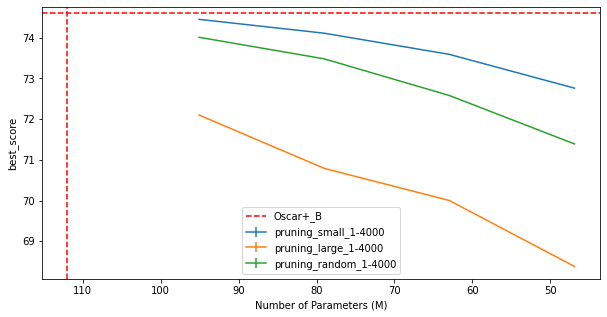

In [3]:
plt.figure(figsize=(10, 5))
# for ck in ['0-1000', '0-2000', '1-4000', '4-10000']:
for ck in ['1-4000']:
    output_dir = 'data/experiments/vqa/pruning_checkpoint-{}/pruning_{}_{}/{}'
    n_repeat = 1
    metric = 'best_score'
    for pruning_strategy in ['small', 'large', 'random']:
        params = []
        res = []
        for pruning_ratio in [0.2, 0.4, 0.6, 0.8]:
            for seed in range(n_repeat):
                resolved_output_dir = output_dir.format(ck, pruning_strategy, pruning_ratio, seed)
                data = json.load(open(resolved_output_dir + '/saved_info.json'))
                params.append(data['params'])
                res.append(data[metric])
        params = np.array(params).reshape((-1, n_repeat))
        res = np.array(res).reshape((-1, n_repeat))
        params = params.mean(1)
        label = 'pruning_' + pruning_strategy + '_' + ck
        plt.errorbar(params, res.mean(1), res.std(1), label = label)
        print(label, res.mean(1))

plt.axhline(y=74.6, color='r', linestyle="dashed", label='Oscar+_B')
# # plt.axhline(y=123.7, color='r', linestyle="dashed", label='Oscar_B')
plt.axvline(x=112, color='r', linestyle="dashed")
# plt.plot(45.7,119.8,'b*', label='MiniVLM')
# plt.plot(45.7,120.8,'gD', label='DistillVLM')
# plt.plot(45.7,118.8,'ro', label='R101 + MiniLM')
# plt.plot(45.7,115,'yx', label='Tee + MiniLM')

plt.xlabel('Number of Parameters (M)')
plt.ylabel(metric)
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('output/res.png', dpi=300)
plt.show()

pruning_small_3000 [74.76 74.04 73.97 73.11]
pruning_large_3000 [72.46 70.89 70.11 68.43]
pruning_random_3000 [73.94 73.49 72.39 70.95]


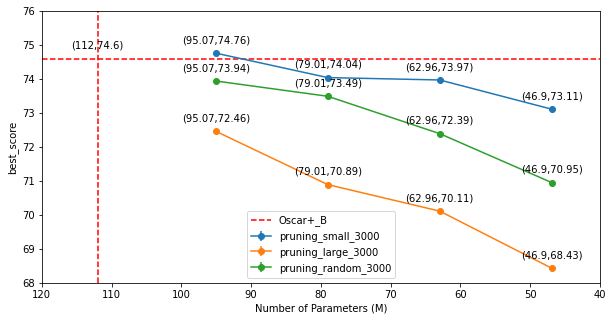

In [47]:
plt.figure(figsize=(10, 5))
for pruning_steps in [3000]:
    output_dir = 'data/experiments/vqa-2/pruning_{}_{}_{}/{}'
    n_repeat = 1
    metric = 'best_score'
    for pruning_strategy in ['small', 'large', 'random']:
        params = []
        res = []
        for pruning_ratio in [0.2, 0.4, 0.6, 0.8]:
            for seed in range(n_repeat):
                resolved_output_dir = output_dir.format(pruning_strategy, pruning_ratio, pruning_steps, seed)
                data = json.load(open(resolved_output_dir + '/saved_info.json'))
                params.append(data['params'])
                res.append(data[metric])
        params = np.array(params).reshape((-1, n_repeat))
        res = np.array(res).reshape((-1, n_repeat))
        params = params.mean(1)
        label = 'pruning_{}_{}'.format(pruning_strategy, pruning_steps)
        plt.errorbar(params, res.mean(1), res.std(1), fmt='o-', label = label)
        print(label, res.mean(1))
        for x,y in zip(params,res.mean(1)):
            plt.annotate(f"({x},{y})", (x,y), textcoords="offset points", xytext=(0,10), ha='center')

x, y = 112, 74.6
plt.axhline(y=y, color='r', linestyle="dashed", label='Oscar+_B')
plt.axvline(x=x, color='r', linestyle="dashed")
plt.annotate(f"({x},{y})", (x,y), textcoords="offset points", xytext=(0,10), ha='center')
# plt.plot(45.7,119.8,'b*', label='MiniVLM')
# plt.plot(45.7,120.8,'gD', label='DistillVLM')
# plt.plot(45.7,118.8,'ro', label='R101 + MiniLM')
# plt.plot(45.7,115,'yx', label='Tee + MiniLM')

plt.ylim([68, 76])
plt.xlim([40, 120])
plt.xlabel('Number of Parameters (M)')
plt.ylabel(metric)
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('output/res.png', dpi=300)
plt.show()

74.15 95.07 5.74 data/experiments/vqa-2/pruning_small_0.2_1000/0
73.68 79.01 4.37 data/experiments/vqa-2/pruning_small_0.4_1000/0
73.97 62.96 3.01 data/experiments/vqa-2/pruning_small_0.6_3000/0
73.97 76.63 4.17 data/experiments/vqa-2/pruning_small_0.2_1e3,2e3/0
73.31 58.2 2.61 data/experiments/vqa-2/pruning_small_0.2_1e3,2e3,3e3/0
71.08 42.13 1.24 data/experiments/vqa-2/pruning_small_0.2_1e3,2e3,3e3,4e3/0
71.91 44.52 1.44 data/experiments/vqa-2/pruning_small_0.4_1e3,2e3/0
pruning_small_1e3,2e3 [74.15 73.68 73.97 73.97 73.31 71.08 71.91]


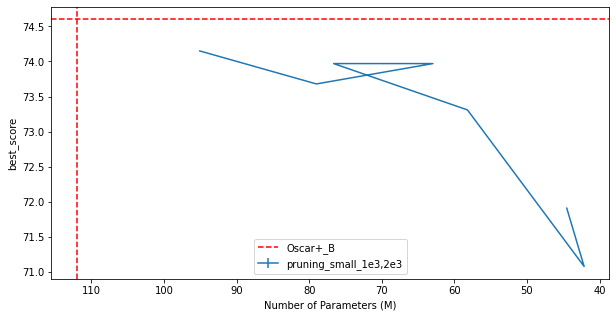

In [30]:
plt.figure(figsize=(10, 5))
output_dir = 'data/experiments/vqa-2/pruning_{}_{}_{}/{}'
n_repeat = 1
metric = 'best_score'
pruning_strategy = 'small'
params = []
res = []
for pruning_steps, pruning_ratio in [('1000', 0.2), ('1000', 0.4),  ('3000', 0.6), ('1e3,2e3', 0.2), ('1e3,2e3,3e3', 0.2), ('1e3,2e3,3e3,4e3', 0.2), ('1e3,2e3', 0.4)]:
    for seed in range(n_repeat):
        resolved_output_dir = output_dir.format(pruning_strategy, pruning_ratio, pruning_steps, seed)
        data = json.load(open(resolved_output_dir + '/saved_info.json'))
        params.append(data['params'])
        res.append(data[metric])
        print(data[metric], data['params'], data['flops'], resolved_output_dir)
params = np.array(params).reshape((-1, n_repeat))
res = np.array(res).reshape((-1, n_repeat))
params = params.mean(1)
label = 'pruning_{}_{}'.format(pruning_strategy, pruning_steps)
plt.errorbar(params, res.mean(1), res.std(1), label = label)
print(label, res.mean(1))

plt.axhline(y=74.6, color='r', linestyle="dashed", label='Oscar+_B')
# # plt.axhline(y=123.7, color='r', linestyle="dashed", label='Oscar_B')
plt.axvline(x=112, color='r', linestyle="dashed")
# plt.plot(45.7,119.8,'b*', label='MiniVLM')
# plt.plot(45.7,120.8,'gD', label='DistillVLM')
# plt.plot(45.7,118.8,'ro', label='R101 + MiniLM')
# plt.plot(45.7,115,'yx', label='Tee + MiniLM')

plt.xlabel('Number of Parameters (M)')
plt.ylabel(metric)
plt.gca().invert_xaxis()
plt.legend()
plt.savefig('output/res.png', dpi=300)
plt.show()